In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium import plugins
from folium.plugins import HeatMap

import datetime
from datetime import date

In [8]:
df_loc = pd.read_csv('bfro_locations.csv')
df_rep_geo = pd.read_csv('bfro_reports_geocoded.csv')
df_rep = pd.read_csv('bfro_reports.csv')

In [9]:
df_loc.head()

,index,number,title,classification,timestamp,latitude,longitude
0,0,637,Report 637: Campers' encounter just after dark...,Class A,2000-06-16T12:00:00Z,61.5000,-142.9000
1,1,2917,Report 2917: Family observes large biped from car,Class A,1995-05-15T12:00:00Z,55.1872,-132.7982
2,2,7963,Report 7963: Sasquatch walks past window of ho...,Class A,2004-02-09T12:00:00Z,55.2035,-132.8202
3,3,9317,"Report 9317: Driver on Alcan Highway has noon,...",Class A,2004-06-18T12:00:00Z,62.9375,-141.5667
4,4,13038,Report 13038: Snowmobiler has encounter in dee...,Class A,2004-02-15T12:00:00Z,61.0595,-149.7853


In [10]:
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           4250 non-null   int64  
 1   number          4250 non-null   int64  
 2   title           4250 non-null   object 
 3   classification  4250 non-null   object 
 4   timestamp       4250 non-null   object 
 5   latitude        4250 non-null   float64
 6   longitude       4250 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 232.6+ KB


In [11]:
df_loc.describe()

,index,number,latitude,longitude
count,4250.000000,4250.000000,4250.000000,4.250000e+03
mean,2124.500000,22586.533647,39.831850,-6.684490e+04
std,1227.013651,19015.127478,6.009091,2.028967e+06
min,0.000000,60.000000,25.141000,-9.486840e+07
25%,1062.250000,6923.750000,35.629365,-1.180889e+02
50%,2124.500000,17230.500000,39.633185,-9.235350e+01
75%,3186.750000,34236.000000,44.824168,-8.316599e+01
max,4249.000000,71997.000000,64.891390,-6.383683e+01


In [12]:
df_loc.nunique()

index             4250
number            4250
title             4250
classification       3
timestamp         3235
latitude          4168
longitude         4158
dtype: int64

In [13]:
df_loc.isna().sum()

index             0
number            0
title             0
classification    0
timestamp         0
latitude          0
longitude         0
dtype: int64

In [14]:
df_loc.dtypes

index               int64
number              int64
title              object
classification     object
timestamp          object
latitude          float64
longitude         float64
dtype: object

In [15]:
df_loc['timestamp'] = pd.to_datetime(df_loc['timestamp'])

In [16]:
df_loc['year'] = df_loc['timestamp'].dt.year
df_loc['month'] = df_loc['timestamp'].dt.month
df_loc['day'] = df_loc['timestamp'].dt.day
df_loc.head()

,index,number,title,classification,timestamp,latitude,longitude,year,month,day
0,0,637,Report 637: Campers' encounter just after dark...,Class A,2000-06-16 12:00:00+00:00,61.5000,-142.9000,2000,6,16
1,1,2917,Report 2917: Family observes large biped from car,Class A,1995-05-15 12:00:00+00:00,55.1872,-132.7982,1995,5,15
2,2,7963,Report 7963: Sasquatch walks past window of ho...,Class A,2004-02-09 12:00:00+00:00,55.2035,-132.8202,2004,2,9
3,3,9317,"Report 9317: Driver on Alcan Highway has noon,...",Class A,2004-06-18 12:00:00+00:00,62.9375,-141.5667,2004,6,18
4,4,13038,Report 13038: Snowmobiler has encounter in dee...,Class A,2004-02-15 12:00:00+00:00,61.0595,-149.7853,2004,2,15


In [18]:
df_loc['year'].describe()

count    4250.000000
mean     1998.971294
std        14.611518
min      1869.000000
25%      1990.000000
50%      2003.000000
75%      2009.000000
max      2053.000000
Name: year, dtype: float64

In [24]:
df_loc[df_loc['year'] != 2053][['year', 'month', 'day']].max()

year     2021
month      12
day        31
dtype: int32

In [25]:
# Remove the year 2053
df_loc = df_loc[df_loc['year'] != 2053]
df_loc['year'].describe()

count    4249.000000
mean     1998.958578
std        14.589702
min      1869.000000
25%      1990.000000
50%      2003.000000
75%      2009.000000
max      2021.000000
Name: year, dtype: float64

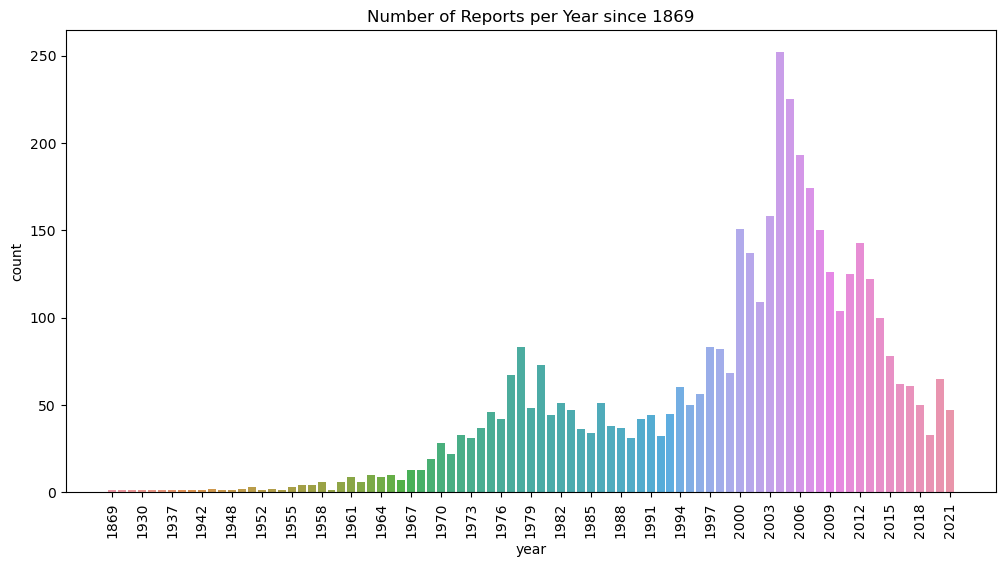

In [30]:
# plot the number of reports per year
plt.figure(figsize=(12,6))
sns.countplot(x='year', data=df_loc)
plt.title('Number of Reports per Year since 1869')
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=35);

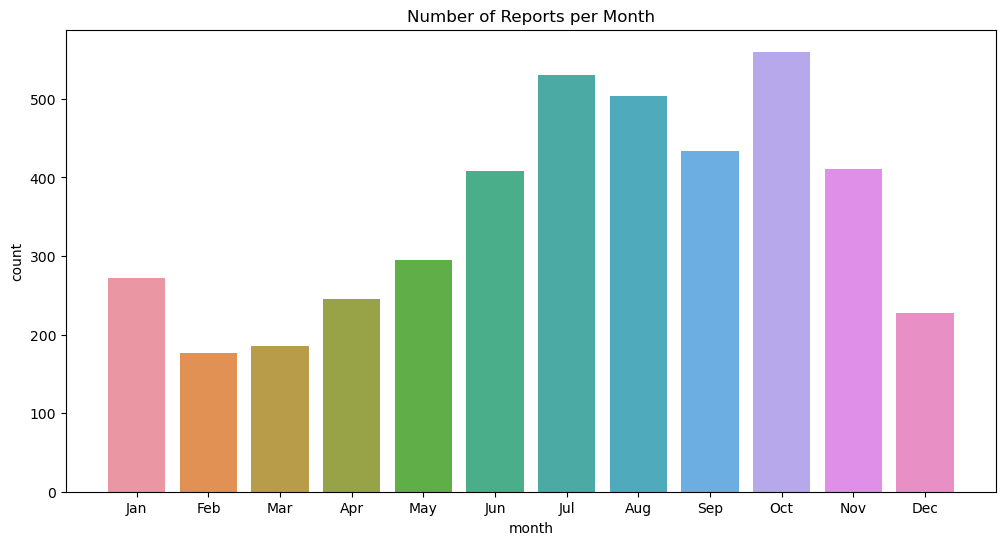

In [27]:
# plot the number of reports per month
plt.figure(figsize=(12,6))
sns.countplot(x='month', data=df_loc)
plt.title('Number of Reports per Month')
plt.locator_params(axis='x', nbins=35)
# map the month number to the month name
plt.xticks(ticks=np.arange(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);

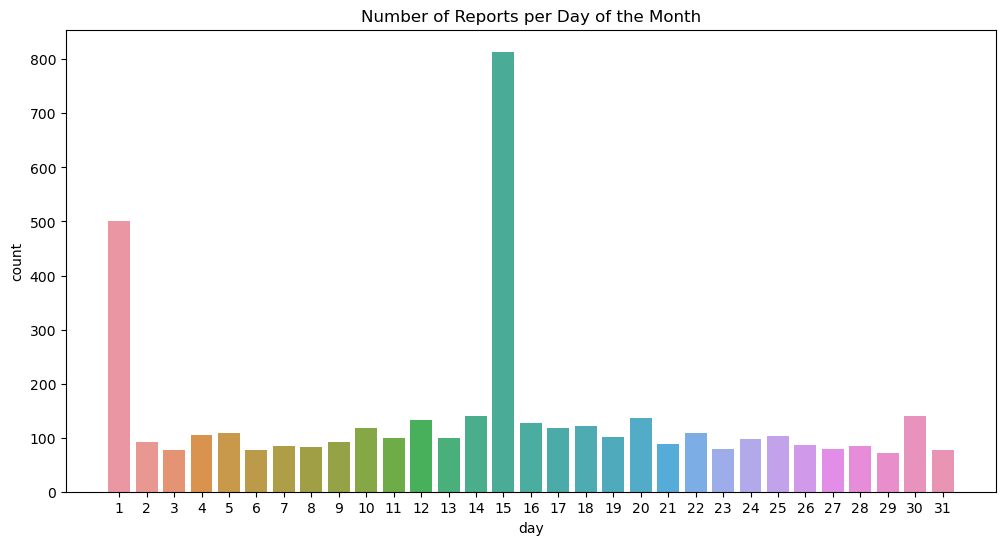

In [31]:
# plot the number of reports per day
plt.figure(figsize=(12,6))
sns.countplot(x='day', data=df_loc)
plt.title('Number of Reports per Day of the Month')
plt.locator_params(axis='x', nbins=35);

In [68]:
map = folium.Map(df_loc[['latitude','longitude']].median().values.tolist(), 
                zoom_start=2)

HeatMap(data=df_loc[['latitude','longitude']].groupby([
    'latitude','longitude']).sum().reset_index().values.tolist(), 
        radius=7, max_zoom=10).add_to(map)

# zoom to the US
map.fit_bounds([[24.396308, -125.0], [49.384358, -66.93457]])

map

In [130]:
import united_states

latitude = 47.6062
longitude = -122.3321
us = united_states.UnitedStates()
state_name = us.from_coords(latitude, longitude)[0]
state_name.abbr


'WA'

In [147]:
for i in range(0,len(df_loc)):
    latitude = df_loc.iloc[i]['latitude']
    longitude = df_loc.iloc[i]['longitude']
    try:
        state_name = us.from_coords(latitude, longitude)[0]
        df_loc.at[i, 'state'] = state_name.abbr
    except:
        df_loc.at[i, 'state'] = 'Not in US'

/opt/anaconda3/envs/conda311/lib/python3.11/site-packages/united_states/geometry.py:57: RuntimeWarning: invalid value encountered in scalar multiply
  left = (by - ay) * (cx - bx)
/opt/anaconda3/envs/conda311/lib/python3.11/site-packages/united_states/geometry.py:58: RuntimeWarning: invalid value encountered in scalar multiply
  right = (bx - ax) * (cy - by)
/opt/anaconda3/envs/conda311/lib/python3.11/site-packages/united_states/geometry.py:57: RuntimeWarning: invalid value encountered in scalar multiply
  left = (by - ay) * (cx - bx)
/opt/anaconda3/envs/conda311/lib/python3.11/site-packages/united_states/geometry.py:58: RuntimeWarning: invalid value encountered in scalar multiply
  right = (bx - ax) * (cy - by)


In [179]:
df_loc.dropna(subset=['state', 'longitude', 'latitude'], inplace=True)
# Drop the rows where the state is not in the US
df_loc = df_loc[df_loc['state'] != 'Not in US']
df_loc['state'].unique()

/var/folders/rg/4zbmxsb52b3_t75jmnsfr4vm0000gn/T/ipykernel_42558/4266042737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc.dropna(subset=['state', 'longitude', 'latitude'], inplace=True)


array(['AK', 'AL', 'GA', 'AR', 'AZ', 'CA', 'NY', 'CO', 'CT', 'FL', 'IA',
       'ID', 'IL', 'IN', 'KY', 'KS', 'MO', 'WV', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'TN', 'MS', 'MT', 'NC', 'SC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'NV', 'OH', 'PA', 'OK', 'OR', 'WA', 'RI', 'VA', 'SD', 'TX',
       'UT', 'VT', 'WI', 'WY', 'DE'], dtype=object)

In [180]:
# Display the reports on the map as a heatmap
map = folium.Map(df_loc[['latitude','longitude']].median().values.tolist(), 
                zoom_start=4)

HeatMap(data=df_loc[['latitude','longitude']].groupby([
    'latitude','longitude']).sum().reset_index().values.tolist(), 
        radius=7, max_zoom=10).add_to(map)

# zoom to the US
map.fit_bounds([[24.396308, -125.0], [49.384358, -66.93457]])

map

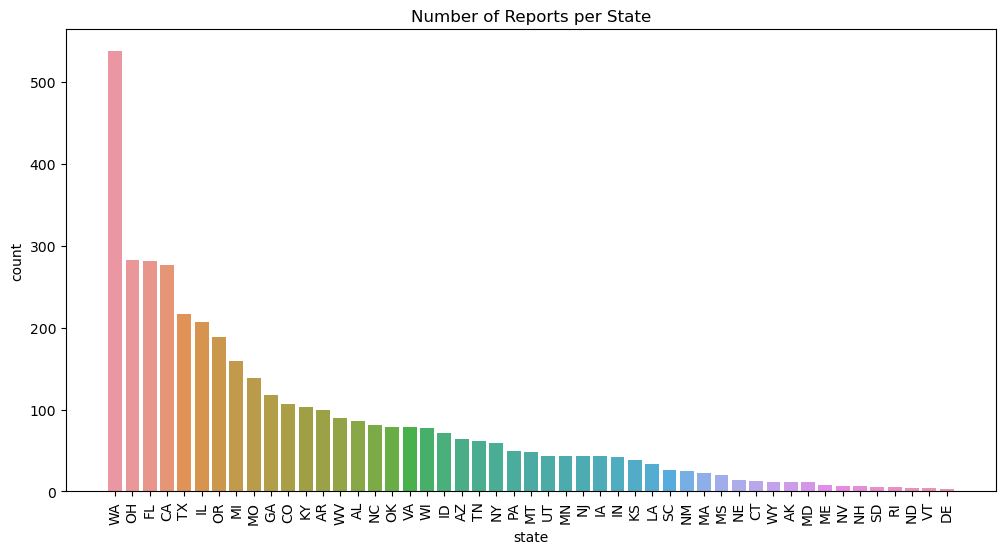

In [181]:
# plot the number of reports per state sorted by the number of reports
plt.figure(figsize=(12,6))
sns.countplot(x='state', data=df_loc, order=df_loc['state'].value_counts().index)
plt.title('Number of Reports per State')
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=50);

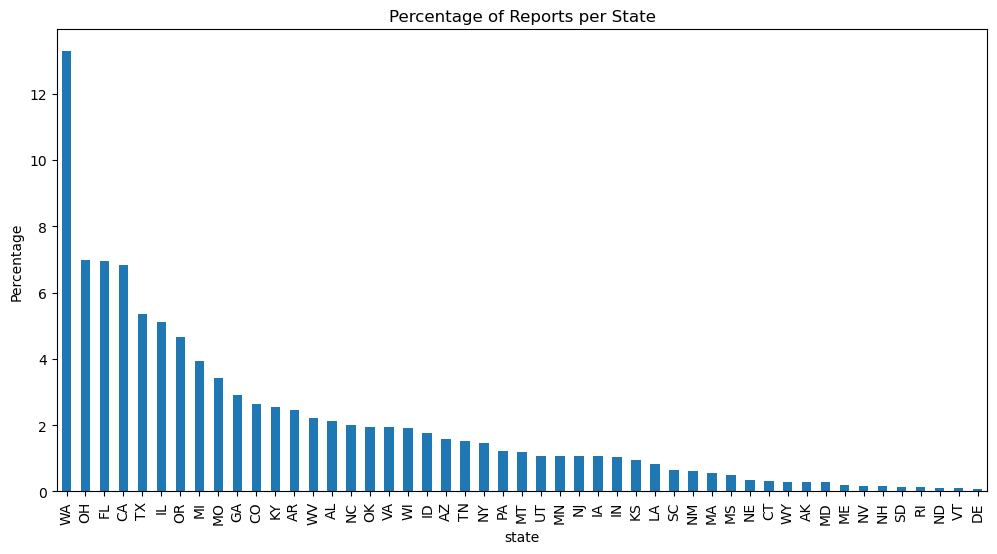

In [182]:
# Plot the percentage of reports per state
plt.figure(figsize=(12,6))
(df_loc['state'].value_counts(normalize=True)*100).plot(kind='bar')
plt.title('Percentage of Reports per State')
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.locator_params(axis='x', nbins=50);

In [199]:
df_occur_by_state_by_year = df_loc.groupby(['state', 'year']).size().reset_index(name='count')
df_occur_by_state_by_year

,state,year,count
0,AK,1995.0,1
1,AK,2000.0,1
2,AK,2001.0,1
3,AK,2003.0,1
4,AK,2004.0,4
...,...,...,...
1369,WY,2002.0,1
1370,WY,2003.0,1
1371,WY,2005.0,1
1372,WY,2007.0,1


In [215]:
# Sort the years in ascending order
df_occur_by_state_by_year['year'] = df_occur_by_state_by_year['year'].astype(int)
df_occur_by_state_by_year = df_occur_by_state_by_year.sort_values('year')

# interactive plot of the number of reports per state with year slider
import plotly.express as px

fig = px.choropleth(df_occur_by_state_by_year,
                    locations='state',
                    locationmode='USA-states',
                    color='count',
                    scope='usa',
                    animation_frame='year',
                    color_continuous_scale='Viridis',
                    title='Number of Reports per State by Year',
                    category_orders={'state': df_occur_by_state_by_year['state'].unique()})
fig.show()